<a href="https://colab.research.google.com/github/BillHuynh/DataScienceProjects/blob/master/CAR_INSURANCE_CUSTOMERS_USING_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import *

In [ ]:
np.random.seed(2021)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SORTING CAR INSURANCE CUSTOMERS USING K-Means Alogrithms 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SCADI.csv', delimiter=',', header=None).values
data1 = pd.DataFrame(data)
data1.head
data2 = data1.drop(data1.columns[[0, 1, 205]], axis=1, inplace=False)
data2 = data2.iloc[1: , :]
print(data2)

   2   3   4   5   6   7   8   9   10   ... 196 197 198 199 200 201 202 203 204
1    0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   1   0   0
2    0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   1   0   0   0
3    0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   1   0   0   0
4    0   0   0   0   1   0   0   0   0  ...   0   0   0   0   1   0   0   0   0
5    0   0   0   0   1   0   0   0   0  ...   0   0   0   0   1   0   0   0   0
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
66   0   0   1   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   0   0
67   0   0   1   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   0   0
68   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   1   0   0   0   0
69   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   1   0   0   0
70   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   1   0   0   0   0

[70 rows x 203 columns]


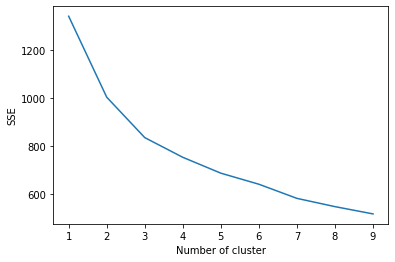

In [ ]:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2)
    data2["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
#normalize our data
from sklearn.preprocessing import scale
Xnorm = scale(data2)


In [ ]:
#perform PCA using sklearn PCA implementation

from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(Xnorm)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

[0.19209699 0.13931345 0.09241733 0.05511281 0.04642985 0.04321097
 0.03692497 0.03114026 0.02825906 0.02744195 0.02526675 0.02276557
 0.02183239 0.01989612]


[19.21 33.14 42.38 47.89 52.53 56.85 60.54 63.65 66.48 69.22 71.75 74.03
 76.21 78.2 ]


Text(0, 0.5, 'Variance captured')

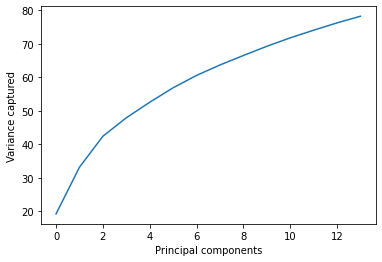

In [ ]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [ ]:
PC_comps = 12
pca = PCA(n_components=12)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)

(70, 12)


In [ ]:
# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)

(70, 204)


In [ ]:

n_comp = range(1,PC_comps+1)
print(n_comp)

range(1, 13)


k=1, rec_error=0.8988342523485864
k=2, rec_error=0.8176732615108753
k=3, rec_error=0.7590600992781704
k=4, rec_error=0.7218444618934072
k=5, rec_error=0.6889336555114777
k=6, rec_error=0.6568246409383593
k=7, rec_error=0.6280872833166847
k=8, rec_error=0.6027880018638659
k=9, rec_error=0.5788733168534796
k=10, rec_error=0.5546641971049066
k=11, rec_error=0.5313996832692838
k=12, rec_error=0.5095292432588451


Text(0, 0.5, 'Reconstruction Error')

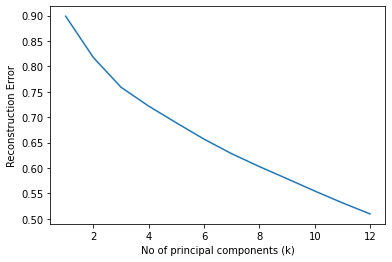

In [ ]:
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0


#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')

# Question 4

In [ ]:
obesity_data = pd.read_csv('/content/drive/MyDrive/obesity_levels.csv', delimiter=',', header=0)
obesity_data1 = pd.DataFrame(obesity_data)


In [ ]:
print(obesity_data1)

      Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936  ...  Public_Transportation     Obesity_Type_III
2110  Female  23.664709  ...  Public_Transportation     Obesity_Type_III

[2111 rows x 17 columns]


In [ ]:
# find unique values 
obesity_data1['CAEC'].unique()
print(obesity_data1['CALC'].unique())
print(obesity_data1['MTRANS'].unique())

['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
print(obesity_data1.head)

<bound method NDFrame.head of       Gender        Age    Height  ...  CALC  MTRANS           NObeyesdad
0          0  21.000000  1.620000  ...     0       2        Normal_Weight
1          0  21.000000  1.520000  ...     1       2        Normal_Weight
2          1  23.000000  1.800000  ...     2       2        Normal_Weight
3          1  27.000000  1.800000  ...     2       0   Overweight_Level_I
4          1  22.000000  1.780000  ...     1       2  Overweight_Level_II
...      ...        ...       ...  ...   ...     ...                  ...
2106       0  20.976842  1.710730  ...     1       2     Obesity_Type_III
2107       0  21.982942  1.748584  ...     1       2     Obesity_Type_III
2108       0  22.524036  1.752206  ...     1       2     Obesity_Type_III
2109       0  24.361936  1.739450  ...     1       2     Obesity_Type_III
2110       0  23.664709  1.738836  ...     1       2     Obesity_Type_III

[2111 rows x 17 columns]>


In [ ]:
#Gender
obesity_data1["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
# Family history
obesity_data1["family_history_with_overweight"].replace({"yes": 1, "no": 0}, inplace=True)
#Gender
obesity_data1["FAVC"].replace({"no": 1, "yes": 0}, inplace=True)
# CAEC
obesity_data1["CAEC"].replace({"no": 0, "Sometimes": 1,"Frequently": 2,"Always": 3}, inplace=True)
#smoke
obesity_data1["SMOKE"].replace({"no": 1, "yes": 0}, inplace=True)
# CAEC
obesity_data1["CALC"].replace({"no": 0, "Sometimes": 1,"Frequently": 2,"Always": 3}, inplace=True)
# CAEC
obesity_data1["MTRANS"].replace({"Walking": 0, "Bike": 1,"Public_Transportation": 2,"Motorbike": 3,"Automobile": 4}, inplace=True)
#SCC
obesity_data1["SCC"].replace({"yes": 1, "no": 0}, inplace=True)



In [ ]:
obesity_data2 = obesity_data1.drop('Weight', 1)
obesity_data2 = obesity_data2.drop('NObeyesdad', 1)
obesity_data3 = pd.DataFrame(obesity_data2)

In [ ]:
print(obesity_data3)

      Gender        Age    Height  ...       TUE  CALC  MTRANS
0          0  21.000000  1.620000  ...  1.000000     0       2
1          0  21.000000  1.520000  ...  0.000000     1       2
2          1  23.000000  1.800000  ...  1.000000     2       2
3          1  27.000000  1.800000  ...  0.000000     2       0
4          1  22.000000  1.780000  ...  0.000000     1       2
...      ...        ...       ...  ...       ...   ...     ...
2106       0  20.976842  1.710730  ...  0.906247     1       2
2107       0  21.982942  1.748584  ...  0.599270     1       2
2108       0  22.524036  1.752206  ...  0.646288     1       2
2109       0  24.361936  1.739450  ...  0.586035     1       2
2110       0  23.664709  1.738836  ...  0.714137     1       2

[2111 rows x 15 columns]


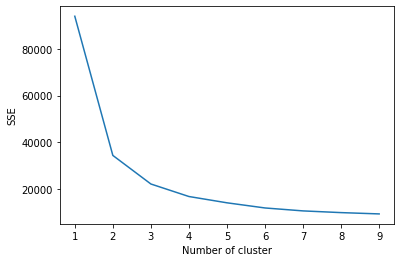

In [ ]:
# find optimal number of clusters
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(obesity_data3)
    obesity_data3["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
obesity_data4 = obesity_data1
obesity_data4['WeightClass']=pd.cut(obesity_data4['Weight'],3,labels=[0,1,2])

In [ ]:
obesity_data5 = obesity_data4.drop('Weight', 1)
obesity_data5 = obesity_data5.drop('NObeyesdad', 1)
obesity_data6 = obesity_data5.drop('WeightClass', 1)

In [ ]:
kmeans2 = KMeans(n_clusters=3, max_iter=1000).fit(obesity_data6)
obesity_data5["clusters"] = kmeans2.labels_

In [ ]:
# finding which class matches baseds on highest matches
class0_0 = obesity_data5.loc[(obesity_data5['WeightClass'] == 0) & (obesity_data5['clusters'] == 0)]
class0_1 = obesity_data5.loc[(obesity_data5['WeightClass'] == 0) & (obesity_data5['clusters'] == 1)]
class0_2 = obesity_data5.loc[(obesity_data5['WeightClass'] == 0) & (obesity_data5['clusters'] == 2)]

class1_0 = obesity_data5.loc[(obesity_data5['WeightClass'] == 1) & (obesity_data5['clusters'] == 0)]
class1_1 = obesity_data5.loc[(obesity_data5['WeightClass'] == 1) & (obesity_data5['clusters'] == 1)]
class1_2 = obesity_data5.loc[(obesity_data5['WeightClass'] == 1) & (obesity_data5['clusters'] == 2)]

class2_0 = obesity_data5.loc[(obesity_data5['WeightClass'] == 2) & (obesity_data5['clusters'] == 0)]
class2_1 = obesity_data5.loc[(obesity_data5['WeightClass'] == 2) & (obesity_data5['clusters'] == 1)]
class2_2 = obesity_data5.loc[(obesity_data5['WeightClass'] == 2) & (obesity_data5['clusters'] == 2)]


In [ ]:
print("0-0", class0_0.shape)
print("0-1",class0_1.shape)
print("0-2",class0_2.shape)
print("1-0",class1_0.shape)
print("1-1",class1_1.shape)
print("1-2",class1_2.shape)
print("2-0",class2_0.shape)
print("2-1",class2_1.shape)
print("2-2",class2_2.shape)
#we are going to swap 1 and 0 clusters labels 

0-0 (812, 17)
0-1 (127, 17)
0-2 (142, 17)
1-0 (315, 17)
1-1 (474, 17)
1-2 (101, 17)
2-0 (119, 17)
2-1 (21, 17)
2-2 (0, 17)


In [ ]:
obesity_data5["clusters"].replace({ 0: 1, 1: 0}, inplace=True)

In [ ]:
print("0-0", class0_0.shape)
print("0-1",class0_1.shape)
print("0-2",class0_2.shape)
print("1-0",class1_0.shape)
print("1-1",class1_1.shape)
print("1-2",class1_2.shape)
print("2-0",class2_0.shape)
print("2-1",class2_1.shape)
print("2-2",class2_2.shape)

0-0 (812, 17)
0-1 (127, 17)
0-2 (142, 17)
1-0 (315, 17)
1-1 (474, 17)
1-2 (101, 17)
2-0 (119, 17)
2-1 (21, 17)
2-2 (0, 17)


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
Truelabels4 = obesity_data5[["clusters"]].to_numpy()
Pridectedlabels4 = obesity_data5[["WeightClass"]].to_numpy()

In [ ]:


print(" rand score is : ", adjusted_rand_score(Truelabels4.ravel(), Pridectedlabels4.ravel()))


 rand score is :  0.14140719167719193


PREDICTING OBESITY

In [ ]:
obesity_data7 = obesity_data1
# removing Insufficient_Weight
obesity_data7 = obesity_data7[obesity_data7.NObeyesdad != "Insufficient_Weight"]

In [ ]:
# repalcing NObeyesdad values
obesity_data7["NObeyesdad"].replace({"Normal_Weight": 0, "Overweight_Level_I": 0,"Overweight_Level_II": 0,"Obesity_Type_I": 1,"Obesity_Type_II": 1,"Obesity_Type_III": 1}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Droping No beyesdad target variable 
obesity_data8 = obesity_data7.drop('NObeyesdad', 1)


In [ ]:
print(obesity_data8)

      Gender        Age    Height  ...  CALC  MTRANS  WeightClass
0          0  21.000000  1.620000  ...     0       2            0
1          0  21.000000  1.520000  ...     1       2            0
2          1  23.000000  1.800000  ...     2       2            0
3          1  27.000000  1.800000  ...     2       0            1
4          1  22.000000  1.780000  ...     1       2            1
...      ...        ...       ...  ...   ...     ...          ...
2106       0  20.976842  1.710730  ...     1       2            2
2107       0  21.982942  1.748584  ...     1       2            2
2108       0  22.524036  1.752206  ...     1       2            2
2109       0  24.361936  1.739450  ...     1       2            2
2110       0  23.664709  1.738836  ...     1       2            2

[1839 rows x 17 columns]


In [ ]:
# fitting k means making 2 clusters
kmeans3 = KMeans(n_clusters=2, max_iter=1000).fit(obesity_data8)
obesity_data7["clusters"] = kmeans3.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(obesity_data7)

      Gender        Age    Height  ...  NObeyesdad  WeightClass  clusters
0          0  21.000000  1.620000  ...           0            0         0
1          0  21.000000  1.520000  ...           0            0         0
2          1  23.000000  1.800000  ...           0            0         0
3          1  27.000000  1.800000  ...           0            1         0
4          1  22.000000  1.780000  ...           0            1         0
...      ...        ...       ...  ...         ...          ...       ...
2106       0  20.976842  1.710730  ...           1            2         1
2107       0  21.982942  1.748584  ...           1            2         1
2108       0  22.524036  1.752206  ...           1            2         1
2109       0  24.361936  1.739450  ...           1            2         1
2110       0  23.664709  1.738836  ...           1            2         1

[1839 rows x 19 columns]


In [ ]:
#we want to find which class is to which
Q5class0_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters'] == 0)]
Q5class0_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters'] == 1)]
Q5class1_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters'] == 0)]
Q5class1_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters'] == 1)]
print("0-0", Q5class0_0.shape)
print("0-1", Q5class0_1.shape)
print("1-0", Q5class1_0.shape)
print("1-1", Q5class1_1.shape)
# we want  swap 0-1 classes

0-0 (843, 19)
0-1 (24, 19)
1-0 (196, 19)
1-1 (776, 19)


In [ ]:
#Not needed anymore ignore
#swapping classes 0-1
#obesity_data7["clusters"].replace({ 0: 1, 1: 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# counting matching real adn predicted varibles 
Q5class0_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters'] == 0)]
Q5class0_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters'] == 1)]
Q5class1_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters'] == 0)]
Q5class1_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters'] == 1)]
print("0-0", Q5class0_0.shape)
print("0-1", Q5class0_1.shape)
print("1-0", Q5class1_0.shape)
print("1-1", Q5class1_1.shape)

0-0 (843, 19)
0-1 (24, 19)
1-0 (196, 19)
1-1 (776, 19)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# measuring cassification results
Truelabels5 = obesity_data7[["NObeyesdad"]].to_numpy()
Pridectedlabels5 = obesity_data7[["clusters"]].to_numpy()
conconfusion_matrix5 = confusion_matrix(Truelabels5.ravel(), Pridectedlabels5.ravel())
accuracy_score5 = (conconfusion_matrix5[0,0] + conconfusion_matrix5[1,1])/(conconfusion_matrix5[0,0] + conconfusion_matrix5[1,1] + conconfusion_matrix5[0,1] + conconfusion_matrix5[1,0] )
Recall_score5 = (conconfusion_matrix5[0,0])/(conconfusion_matrix5[0,0]+conconfusion_matrix5[1,0])
Flase_positive_rate5 = (conconfusion_matrix5[0,1])/(conconfusion_matrix5[0,1]+conconfusion_matrix5[1,0])


In [ ]:
print(" rand score is : ", adjusted_rand_score(Truelabels5.ravel(), Pridectedlabels5.ravel()))
# Calculate Silhoutte Score
silhouettescore = silhouette_score(obesity_data8, kmeans3.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % silhouettescore)

 rand score is :  0.5784766969326517
Silhouetter Score: 0.572


In [ ]:
print("K-means No PCA ")
print("Confusion Matrix ", conconfusion_matrix5)
print("accuracy score is ", accuracy_score5*100)
print("Recall score (TPR) is ", Recall_score5*100)
print("False positive rate score (FPR) is ", Flase_positive_rate5*100)


K-means No PCA 
Confusion Matrix  [[843  24]
 [196 776]]
accuracy score is  88.03697661772702
Recall score (TPR) is  81.13570741097209
False positive rate score (FPR) is  10.909090909090908


In [ ]:
#testing what number principal components to be used 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
Xnorm5 = scale(obesity_data8)
pca = PCA(n_components=10)
pca.fit(Xnorm5)
var= pca.explained_variance_ratio_
print(var)

[0.17773743 0.11337297 0.09924758 0.07891874 0.06777085 0.06022281
 0.05904906 0.05307163 0.05210136 0.04623384]


[17.77 29.11 39.03 46.92 53.7  59.72 65.62 70.93 76.14 80.76]


Text(0, 0.5, 'Variance captured')

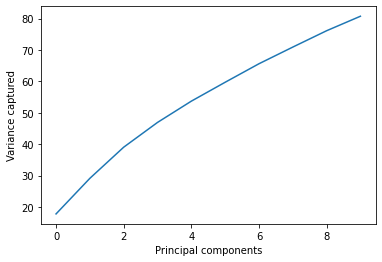

In [ ]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
# PC to be used is 9 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(obesity_data8)
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
obesity_data_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
obesity_data_normalized = pd.DataFrame(obesity_data_normalized)

In [ ]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(obesity_data_normalized)
principal_obesity_data = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 
                          'principal component 4', 'principal component 5', 'principal component 6', 
                          'principal component 7', 'principal component 8', 'principal component 9'])

In [ ]:
print(principal_obesity_data)

      principal component 1  ...  principal component 9
0                 -0.642873  ...               0.254595
1                 -0.284613  ...               0.086432
2                 -0.082683  ...               0.011600
3                  0.103846  ...               0.349423
4                 -0.186653  ...               0.547557
...                     ...  ...                    ...
1834               0.628161  ...              -0.227458
1835               0.731370  ...              -0.142933
1836               0.739431  ...              -0.149547
1837               0.754972  ...              -0.045242
1838               0.750659  ...              -0.027662

[1839 rows x 9 columns]


In [ ]:
# redo K-means model + PCA(pc = 9)
kmeans4 = KMeans(n_clusters=2, max_iter=1000).fit(principal_obesity_data)
obesity_data7["clusters2"] = kmeans4.labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(obesity_data7)

      Gender        Age    Height  ...  WeightClass  clusters  clusters2
0          0  21.000000  1.620000  ...            0         1          0
1          0  21.000000  1.520000  ...            0         1          0
2          1  23.000000  1.800000  ...            0         1          0
3          1  27.000000  1.800000  ...            1         1          1
4          1  22.000000  1.780000  ...            1         1          0
...      ...        ...       ...  ...          ...       ...        ...
2106       0  20.976842  1.710730  ...            2         0          1
2107       0  21.982942  1.748584  ...            2         0          1
2108       0  22.524036  1.752206  ...            2         0          1
2109       0  24.361936  1.739450  ...            2         0          1
2110       0  23.664709  1.738836  ...            2         0          1

[1839 rows x 20 columns]


In [ ]:
# counting matching real and predicted varibles 
Q5_1class0_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters2'] == 0)]
Q5_1class0_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters2'] == 1)]
Q5_1class1_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters2'] == 0)]
Q5_1class1_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters2'] == 1)]
print("0-0", Q5_1class0_0.shape)
print("0-1", Q5_1class0_1.shape)
print("1-0", Q5_1class1_0.shape)
print("1-1", Q5_1class1_1.shape)
# assume to swap 0-1 classes

0-0 (142, 20)
0-1 (725, 20)
1-0 (758, 20)
1-1 (214, 20)


In [ ]:
#swapping classes 0-1
obesity_data7["clusters2"].replace({ 0: 1, 1: 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# measuring cassification results
Truelabels5_1 = obesity_data7[["NObeyesdad"]].to_numpy()
Pridectedlabels5_1 = obesity_data7[["clusters2"]].to_numpy()
conconfusion_matrix6 = confusion_matrix(Truelabels5_1.ravel(), Pridectedlabels5_1.ravel())
accuracy_score5_1 = (conconfusion_matrix6[0,0] + conconfusion_matrix6[1,1])/(conconfusion_matrix6[0,0] + conconfusion_matrix6[1,1] + conconfusion_matrix6[0,1] + conconfusion_matrix6[1,0] )
Recall_score5_1 = (conconfusion_matrix6[0,0])/(conconfusion_matrix6[0,0]+conconfusion_matrix6[1,0])
Flase_positive_rate5_1 = (conconfusion_matrix6[0,1])/(conconfusion_matrix6[0,1]+conconfusion_matrix6[1,0])

In [ ]:
print(" rand score is : ", adjusted_rand_score(Truelabels5_1.ravel(), Pridectedlabels5_1.ravel()))
# Calculate Silhoutte Score
silhouettescore = silhouette_score(principal_obesity_data, kmeans4.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % silhouettescore)

 rand score is :  0.3752247844714236
Silhouetter Score: 0.183


In [ ]:
print("Kmeans + PCA (n=9)")
print("Confusion Matrix ", conconfusion_matrix6)
print("accuracy score is ", accuracy_score5_1*100)
print("Recall score (TPR) is ", Recall_score5_1*100)
print("False positive rate score (FPR) is ", Flase_positive_rate5_1*100)
# using PCA made the model worse 

Confusion Matrix  [[725 142]
 [214 758]]
accuracy score is  80.64165307232192
Recall score (TPR) is  77.209797657082
False positive rate score (FPR) is  39.8876404494382


In [ ]:
# now we use Spectral Clustering instead of kmeans
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,).fit(principal_obesity_data)
obesity_data7["clusters3"] = clustering.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# counting matching real and predicted varibles 
Q5_2class0_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters3'] == 0)]
Q5_2class0_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 0) & (obesity_data7['clusters3'] == 1)]
Q5_2class1_0 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters3'] == 0)]
Q5_2class1_1 = obesity_data7.loc[(obesity_data7['NObeyesdad'] == 1) & (obesity_data7['clusters3'] == 1)]
print("0-0", Q5_2class0_0.shape)
print("0-1", Q5_2class0_1.shape)
print("1-0", Q5_2class1_0.shape)
print("1-1", Q5_2class1_1.shape)

0-0 (806, 21)
0-1 (61, 21)
1-0 (362, 21)
1-1 (610, 21)


In [ ]:
# measuring cassification results
Truelabels5_2 = obesity_data7[["NObeyesdad"]].to_numpy()
Pridectedlabels5_2 = obesity_data7[["clusters3"]].to_numpy()
conconfusion_matrix7 = confusion_matrix(Truelabels5_2.ravel(), Pridectedlabels5_2.ravel())
accuracy_score5_2 = (conconfusion_matrix7[0,0] + conconfusion_matrix7[1,1])/(conconfusion_matrix7[0,0] + conconfusion_matrix7[1,1] + conconfusion_matrix7[0,1] + conconfusion_matrix7[1,0] )
Recall_score5_2 = (conconfusion_matrix7[0,0])/(conconfusion_matrix7[0,0]+conconfusion_matrix7[1,0])
Flase_positive_rate5_2 = (conconfusion_matrix7[0,1])/(conconfusion_matrix7[0,1]+conconfusion_matrix7[1,0])

In [ ]:
print(" rand score is : ", adjusted_rand_score(Truelabels5_2.ravel(), Pridectedlabels5_2.ravel()))
# Calculate Silhoutte Score
silhouettescore = silhouette_score(principal_obesity_data, clustering.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % silhouettescore)

 rand score is :  0.2910395733703825
Silhouetter Score: 0.183


In [ ]:
print("Confusion Matrix ", conconfusion_matrix7)
print("accuracy score is ", accuracy_score5_2*100)
print("Recall score (TPR) is ", Recall_score5_2*100)
print("False positive rate score (FPR) is ", Flase_positive_rate5_2*100)

Confusion Matrix  [[806  61]
 [362 610]]
accuracy score is  76.99836867862969
Recall score (TPR) is  69.0068493150685
False positive rate score (FPR) is  14.420803782505912


EXTRA WORK

In [ ]:
weathert = np.random.normal(loc=25, scale=2.0, size=600)

In [ ]:

elements1 = [1, 0]
probabilities1 = [0.60, 0.4]


In [ ]:
df = pd.DataFrame(data=weathert)
df.columns = ["Temp"]
df['seasons']=pd.cut(df['Temp'],4,labels=["winter","autumn","spring", "summer"])
df["price"] = np.random.normal(loc=100, scale=3, size=600)
df["pools"] = pd.cut(df['Temp'],2,labels=[0,1])
df["resturant"] = np.random.choice(elements1, 600, p=probabilities1)
df["golf_course"] = pd.cut(df['Temp'],3,labels=[0,1,2])

In [ ]:
# hotel data set
print(df)

          Temp seasons       price pools  resturant golf_course
0    26.339966  spring   99.808193     1          1           1
1    22.875701  autumn  102.139802     0          1           1
2    24.639392  autumn   98.348240     0          1           1
3    26.525367  spring  100.935860     1          0           1
4    23.675355  autumn  100.107863     0          1           1
..         ...     ...         ...   ...        ...         ...
595  22.829340  autumn  104.978807     0          1           1
596  26.632592  spring  100.562021     1          1           1
597  22.372999  autumn   97.043543     0          0           0
598  23.125598  autumn   99.186998     0          0           1
599  26.716862  spring   97.777402     1          1           1

[600 rows x 6 columns]


In [ ]:
df["seasons"].replace({ "winter": 0,"autumn":1,"spring":2, "summer":3}, inplace=True)

In [ ]:
print(df)

          Temp  seasons       price pools  resturant golf_course
0    26.339966        2   99.808193     1          1           1
1    22.875701        1  102.139802     0          1           1
2    24.639392        1   98.348240     0          1           1
3    26.525367        2  100.935860     1          0           1
4    23.675355        1  100.107863     0          1           1
..         ...      ...         ...   ...        ...         ...
595  22.829340        1  104.978807     0          1           1
596  26.632592        2  100.562021     1          1           1
597  22.372999        1   97.043543     0          0           0
598  23.125598        1   99.186998     0          0           1
599  26.716862        2   97.777402     1          1           1

[600 rows x 6 columns]


In [ ]:
df2 = df.drop('seasons', 1)

In [ ]:
kmeans6 = KMeans(n_clusters=4, max_iter=1000).fit(df2)
df["clusters"] = kmeans6.labels_

In [ ]:
print(df)

          Temp  seasons       price pools  resturant golf_course  clusters
0    26.339966        2   99.808193     1          1           1         2
1    22.875701        1  102.139802     0          1           1         1
2    24.639392        1   98.348240     0          1           1         0
3    26.525367        2  100.935860     1          0           1         2
4    23.675355        1  100.107863     0          1           1         0
..         ...      ...         ...   ...        ...         ...       ...
595  22.829340        1  104.978807     0          1           1         1
596  26.632592        2  100.562021     1          1           1         2
597  22.372999        1   97.043543     0          0           0         0
598  23.125598        1   99.186998     0          0           1         0
599  26.716862        2   97.777402     1          1           1         3

[600 rows x 7 columns]


In [ ]:
Truelabels5_1 = df[["seasons"]].to_numpy()
Pridectedlabels5_1 = df[["clusters"]].to_numpy()
conconfusion_matrix8 = confusion_matrix(Truelabels5_1.ravel(), Pridectedlabels5_1.ravel())
print(conconfusion_matrix8)

[[ 13   7   0   0]
 [137  70   1  43]
 [  8  38 163  86]
 [  0   3  24   7]]


In [ ]:
print(" rand score is : ", adjusted_rand_score(Truelabels5_1.ravel(), Pridectedlabels5_1.ravel()))
# Calculate Silhoutte Score
silhouettescore = silhouette_score(df2, kmeans6.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % silhouettescore)

 rand score is :  0.27206804660933376
Silhouetter Score: 0.306
